In [1]:
import pandas as pd

from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

from joblib import load
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv("NCTCoutput.csv",index_col=False)

In [3]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [4]:
selected_columns=["locus tag","essential","DNA","protein sequence"]
Xs= df.drop(columns=selected_columns)
y=df["essential"]

In [5]:
model = load("../../../model/RF_model.joblib")

In [6]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_rf = []

# 对每个折叠进行迭代
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # 对训练集进行下采样
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    # 在下采样后的训练集上训练模型
    model.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_rf.append(accuracy_fold)

0.6056338028169014
0.6232394366197183
0.5985915492957746
0.6267605633802817
0.5704225352112676
0.5950704225352113
0.6373239436619719
0.6161971830985915
0.5985915492957746
0.7031802120141343


In [7]:
model_rf_fs = load("../../../model/RF_FS_model.joblib")

In [8]:
accuracy_rf_fs = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    rfe = RFE(model_rf_fs, n_features_to_select=9)
    X_selected = rfe.fit_transform(X_train_undersampled, y_train_undersampled)
    model_rf_fs.fit(X_selected,y_train_undersampled)
    X_test = rfe.fit_transform(X_test_fold,y_test_fold)
    y_pred_fold = model_rf_fs.predict(X_test)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_rf_fs.append(accuracy_fold)

0.7077464788732394
0.8591549295774648
0.7077464788732394
0.8732394366197183
0.8274647887323944
0.8133802816901409
0.8133802816901409
0.7922535211267606
0.7147887323943662
0.7031802120141343


In [9]:
model_xgb = load("../../../model/XGB_model.joblib")
accuracy_xgb = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_xgb.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_xgb.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_xgb.append(accuracy_fold)

0.6936619718309859
0.704225352112676
0.7288732394366197
0.721830985915493
0.7147887323943662
0.6901408450704225
0.7394366197183099
0.7288732394366197
0.7112676056338029
0.7173144876325088


In [10]:
model_xgb_fs = load("../../../model/XGB_FS_model.joblib")
accuracy_xgb_fs = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    rfe = RFE(model_xgb_fs, n_features_to_select=6)
    X_selected = rfe.fit_transform(X_train_undersampled, y_train_undersampled)
    model_xgb_fs.fit(X_selected,y_train_undersampled)
    X_test = rfe.fit_transform(X_test_fold,y_test_fold)
    y_pred_fold = model_xgb_fs.predict(X_test)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_xgb_fs.append(accuracy_fold)

0.8098591549295775
0.9084507042253521
0.647887323943662
0.8943661971830986
0.852112676056338
0.8802816901408451
0.852112676056338
0.8591549295774648
0.778169014084507
0.8056537102473498


In [11]:
model_mlp = load("../../../model/MLP_model.joblib")
accuracy_mlp = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_mlp.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_mlp.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_mlp.append(accuracy_fold)

0.7640845070422535
0.6619718309859155
0.721830985915493
0.647887323943662
0.7359154929577465
0.7007042253521126
0.6795774647887324
0.5633802816901409
0.7570422535211268
0.6855123674911661


In [12]:
model_svm = load("../../../model/SVM_model.joblib")
accuracy_svm = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_svm.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_svm.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_svm.append(accuracy_fold)

0.7711267605633803
0.7640845070422535
0.7640845070422535
0.7852112676056338
0.7147887323943662
0.7077464788732394
0.7711267605633803
0.7746478873239436
0.7077464788732394
0.784452296819788


In [13]:
model_nb = load("../../../model/NB_model.joblib")
accuracy_nb = []
for train_index, test_index in kf.split(Xs):
    X_train_fold, X_test_fold = Xs.iloc[train_index], Xs.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_fold, y_train_fold)
    
    model_nb.fit(X_train_undersampled, y_train_undersampled)
    
    # 在测试集上进行预测
    y_pred_fold = model_nb.predict(X_test_fold)
    
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    print(accuracy_fold)
    
    # 存储当前折叠的准确率
    accuracy_nb.append(accuracy_fold)

0.4119718309859155
0.40492957746478875
0.4647887323943662
0.41901408450704225
0.4507042253521127
0.4295774647887324
0.41901408450704225
0.40492957746478875
0.4119718309859155
0.38162544169611307


In [14]:
models = ['Random Forest', 'XGBoost', 'Naive Bayes', 'MLP', 'SVM']

# 创建一个包含均值和方差的字典
data = {
    'Model': models,
    'Mean Accuracy': [pd.Series(accuracy_rf).mean(), pd.Series(accuracy_xgb).mean(), pd.Series(accuracy_nb).mean(), pd.Series(accuracy_mlp).mean(), pd.Series(accuracy_svm).mean()],
    'Variance': [pd.Series(accuracy_rf).var(), pd.Series(accuracy_xgb).var(), pd.Series(accuracy_nb).var(), pd.Series(accuracy_mlp).var(), pd.Series(accuracy_svm).var()]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 将DataFrame写入CSV文件
df.to_csv('model_NCTCaccuracy.csv', index=False)

In [15]:
models = ['Random Forest', 'XGBoost']

# 创建一个包含均值和方差的字典
data = {
    'Model': models,
    'Mean Accuracy': [pd.Series(accuracy_rf_fs).mean(), pd.Series(accuracy_xgb_fs).mean()],
    'Variance': [pd.Series(accuracy_rf_fs).var(), pd.Series(accuracy_xgb_fs).var()]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 将DataFrame写入CSV文件
df.to_csv('model_NCTCfs_accuracy.csv', index=False)

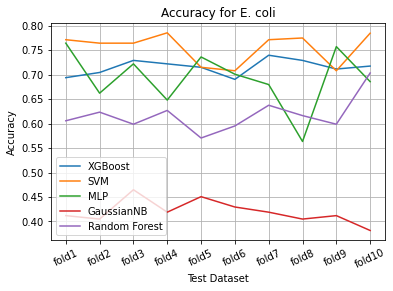

In [19]:
x = [f"fold{i}" for i in range(1, 11)]
plt.plot(x, accuracy_xgb, label='XGBoost')
plt.plot(x, accuracy_svm, label='SVM')
plt.plot(x, accuracy_mlp, label='MLP')
plt.plot(x, accuracy_nb, label='GaussianNB')
plt.plot(x, accuracy_rf, label='Random Forest')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for E. coli')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('NCTC.jpg')
plt.show()

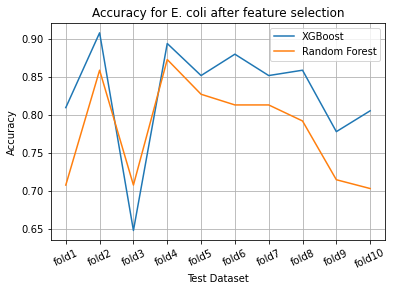

In [18]:
x = [f"fold{i}" for i in range(1, 11)]
plt.plot(x, accuracy_xgb_fs, label='XGBoost')
plt.plot(x, accuracy_rf_fs, label='Random Forest')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for E. coli after feature selection')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('NCTC_fs.jpg')
plt.show()